<a href="https://colab.research.google.com/github/vvillbiii/business-data-analytics-and-intelligence-colab-notebooks/blob/main/Logistic_regression_will.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/1 Projects/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/1 Projects/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np 
import seaborn as sns

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# Data analysis 

In [ ]:
# summary stats
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e27bd6970>,
      dtype=object)

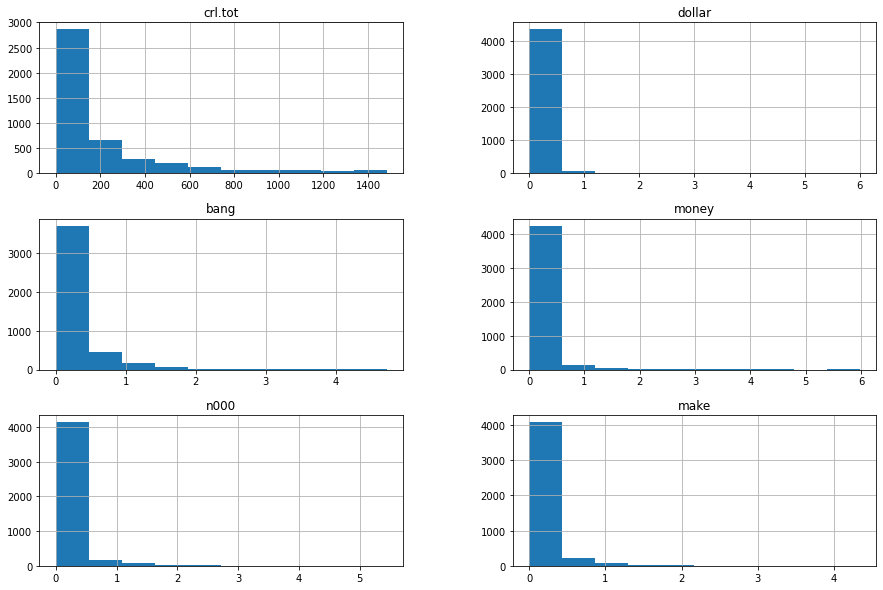

In [ ]:
#histogram
df.hist(figsize=(15,10))

In [ ]:
# removing outliers
print(len(df))
df = df[df['crl.tot']< 1500]
df = df[df['bang']< 5]
df = df[df['money']< 6]
print(len(df))

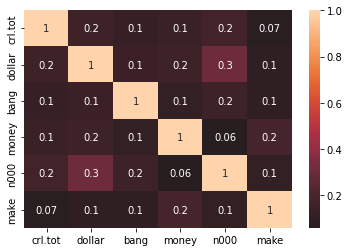

In [ ]:
# correleation matrix
sns.heatmap(df.corr(), annot=True, fmt='.1g', center=0)

# logistic regression prepaparion

In [ ]:
# dependent variable 
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [ ]:
# prepare x and y
y = df.yesno
X = df.iloc[:,:-1]
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.000,0.778,0.00,0.00,0.00
1,1.0,1028,0.180,0.372,0.43,0.43,0.21
2,1.0,2259,0.184,0.276,0.06,1.16,0.06
3,1.0,191,0.000,0.137,0.00,0.00,0.00
4,1.0,191,0.000,0.135,0.00,0.00,0.00


In [ ]:
# training and test splits 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2, random_state=1502)

# logistic Regression

In [ ]:
# logistic regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.451304
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3673
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.3275
Time:                        20:39:02   Log-Likelihood:                -1660.8
converged:                       True   LL-Null:                       -2469.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6443      0.059    -27.977      0.000      -1.760      -1.529
crl.tot        0.0006      0.

In [ ]:
# creating function
def logistic_reader(coeffient):
  probabililty = round((np.exp(coeffient) - 1) * 100, 2)
  if probabililty > 0:
    print("the likelihood increases by", probabililty,"%")
  elif probabililty == 0:
    print("there is no impact")
  else:
    print("the likely decreases by", probabililty, "%")

In [ ]:
# apply function
logistic_reader(0.0006)

the likelihood increases by 0.06 %


# assessing the model

In [ ]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([0, 0, 1, 0, 1])

In [ ]:
#check if dataset is balanced 
y_test.mean()

0.38870792616720956

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[530  33]
 [122 236]]


In [ ]:
# Accuracy 
accuracy = (tp + tn) / ( tn + fp + fn + tp)
print("accuracy:", round(accuracy * 100, 2), "%")

#f1
f1 = 2 * tp / (2 * tp + fn + fp)
print("f1 score:", round(f1 * 100, 2), "%")

#specificity
specificity = tn / (tn + fp)
print("specificity:", round(specificity * 100, 2), "%")

#sensitivity
sensitivity = tp / (tp + fn)
print("sensitivity:", round(sensitivity * 100, 2), "%")


accuracy: 83.17 %
f1 score: 75.28 %
specificity: 94.14 %
sensitivity: 65.92 %


In [ ]:
#classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       563
           1       0.88      0.66      0.75       358

    accuracy                           0.83       921
   macro avg       0.85      0.80      0.81       921
weighted avg       0.84      0.83      0.83       921

